In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn import metrics,preprocessing,model_selection
from sklearn.metrics import accuracy_score

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.1MB 8.5MB/s 
     |████████████████████████████████| 901kB 46.1MB/s 
     |████████████████████████████████| 3.3MB 48.9MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
yelp = pd.read_json('/content/drive/MyDrive/CS182_proj/yelp_review_training_dataset.jsonl', lines=True)
yelp.head()

,review_id,text,stars
0,Q1sbwvVQXV2734tPgoKj4Q,Total bill for this horrible service? Over $8G...,1
1,GJXCdrto3ASJOqKeVWPi6Q,I *adore* Travis at the Hard Rock's new Kelly ...,5
2,2TzJjDVDEuAW6MR5Vuc1ug,I have to say that this office really has it t...,5
3,yi0R0Ugj_xUx_Nek0-_Qig,Went in for a lunch. Steak sandwich was delici...,5
4,11a8sVPMUFtaC7_ABRkmtw,Today was my second out of three sessions I ha...,1


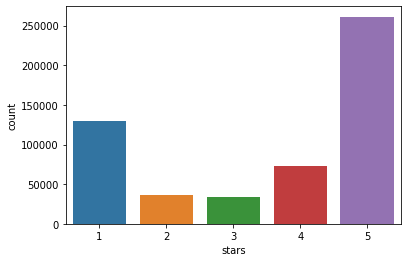

In [ ]:
stars = yelp['stars'].values
ax = sns.countplot(x="stars",data=yelp)

In [ ]:
yelp.shape

(533581, 3)

In [ ]:
yelp[yelp.stars.notnull()]

,review_id,text,stars
0,Q1sbwvVQXV2734tPgoKj4Q,Total bill for this horrible service? Over $8G...,1
1,GJXCdrto3ASJOqKeVWPi6Q,I *adore* Travis at the Hard Rock's new Kelly ...,5
2,2TzJjDVDEuAW6MR5Vuc1ug,I have to say that this office really has it t...,5
3,yi0R0Ugj_xUx_Nek0-_Qig,Went in for a lunch. Steak sandwich was delici...,5
4,11a8sVPMUFtaC7_ABRkmtw,Today was my second out of three sessions I ha...,1
...,...,...,...
533576,2vQO_kmSr6YPBrR8GH_FPA,Dr Young and her assistants take obvious pride...,5
533577,DUdLTGVpgsi0sv_g4A5ITQ,We started our 20 month of daughter here on an...,5
533578,AKGELpRNTTXajuZHbPxdJg,"First of all, they are supposed to open at 9:0...",2
533579,ghYZM7lqzjej05I_T3vYyA,It's not often that you visit a company and th...,5


In [ ]:
x_train = yelp['text'].values

In [ ]:
x_train[0]

'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.'

In [ ]:
import re
symbol = r'\w+|[^\s\w]+'
res = re.findall( symbol, x_train[0])
res

['Total',
 'bill',
 'for',
 'this',
 'horrible',
 'service',
 '?',
 'Over',
 '$',
 '8Gs',
 '.',
 'These',
 'crooks',
 'actually',
 'had',
 'the',
 'nerve',
 'to',
 'charge',
 'us',
 '$',
 '69',
 'for',
 '3',
 'pills',
 '.',
 'I',
 'checked',
 'online',
 'the',
 'pills',
 'can',
 'be',
 'had',
 'for',
 '19',
 'cents',
 'EACH',
 '!',
 'Avoid',
 'Hospital',
 'ERs',
 'at',
 'all',
 'costs',
 '.']

In [ ]:
training = [re.findall( symbol, i) for i in x_train]

In [ ]:
import numpy as np
training = np.array(training)
x_train = np.array(x_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
training = list(training)
first_part = round(len(training) * 1)
print(first_part)

533581


In [ ]:
!pip uninstall gensim
!pip install gensim

Uninstalling gensim-3.6.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/gensim-3.6.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/gensim/*
Proceed (y/n)? y
  Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 23.9MB 133kB/s 


In [ ]:
from gensim.models import Word2Vec
self_model = Word2Vec(training[:first_part], min_count=1)

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
training_sample = [[self_model.wv.key_to_index[word] for word in sentence] for sentence in training[:first_part]]

In [ ]:
self_model.wv.index_to_key[0]

'.'

In [ ]:
from sklearn.model_selection import train_test_split
y = np.array(stars[:first_part])
training_sample = np.array(training_sample)
train_x, val_x, train_y, val_y = train_test_split(training_sample, y, test_size=0.2, random_state=42)
#train_x, val_x, train_y, val_y = train_test_split(x_train[:first_part], y, test_size=0.3, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-cased")
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
bert_model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 108,311,810
Trainable params: 108,311,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
train = pd.DataFrame([train_x, train_y]).T
train.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
train.head()

,DATA_COLUMN,LABEL_COLUMN
0,"[22, 40, 11790, 285, 32, 628, 1223, 12, 6, 419...",4
1,"[22, 664, 63, 29, 38, 330, 0, 3, 155, 85, 3, 3...",1
2,"[3, 20, 71, 126, 5, 38573, 10, 246, 678, 166, ...",5
3,"[298, 54, 73, 0, 9282, 336, 10, 293, 73, 2, 45...",4
4,"[22, 416, 547, 86, 6, 183, 192, 21, 842, 3211,...",5


In [ ]:
test = pd.DataFrame([val_x, val_y]).T
test.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
test.head()

,DATA_COLUMN,LABEL_COLUMN
0,"[9027, 1234, 17, 4797, 46, 100039, 7, 30, 2583...",5
1,"[487, 9, 1, 131, 1223, 1302, 3, 7, 91, 158, 28...",5
2,"[938, 12, 1667, 356, 5, 338, 63, 2, 207, 40, 1...",5
3,"[1287, 0, 99, 1114, 3832, 8, 3274, 5, 14, 2302...",5
4,"[3, 20, 71, 126, 5, 63, 10, 6, 372, 166, 2, 3,...",4


In [ ]:
maxlen = 200
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'DATA_COLUMN', 
                                                                           'LABEL_COLUMN')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=maxlen):
    input_id = [] # -> will hold InputFeatures to be converted later
    mask = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        input_id.append(input_ids)
        mask.append(attention_mask)

    return (np.array(input_id), np.array(mask))

DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL_COLUMN'


In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_id, train_mask = train_data[0], train_data[1]

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_id, validation_mask = validation_data[0], validation_data[1]

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

def create_model(bert_model):
  input_ids = tf.keras.Input(shape=(maxlen,),dtype='int32')
  attention_masks = tf.keras.Input(shape=(maxlen,),dtype='int32')
  
  output = bert_model([input_ids,attention_masks])
  output = output.logits
  output = tf.keras.layers.Dense(128,activation='relu')(output)
  output = tf.keras.layers.Dropout(0.15)(output)
  output = tf.keras.layers.Dense(32,activation='relu')(output)
  output = tf.keras.layers.Dropout(0.15)(output)

  output = tf.keras.layers.Dense(6,activation='softmax')(output)
  model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
  return model

In [ ]:
model = create_model(bert_model)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

In [ ]:

model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit([train_id, train_mask], train_y, batch_size=32, epochs=2, validation_data=([validation_id, validation_mask], val_y))

Epoch 1/2
 9854/13340 [=====================>........] - ETA: 1:11:55 - loss: 1.3461 - accuracy: 0.4800